In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from skimage.transform import resize
from skimage.io import imread
from PIL import Image



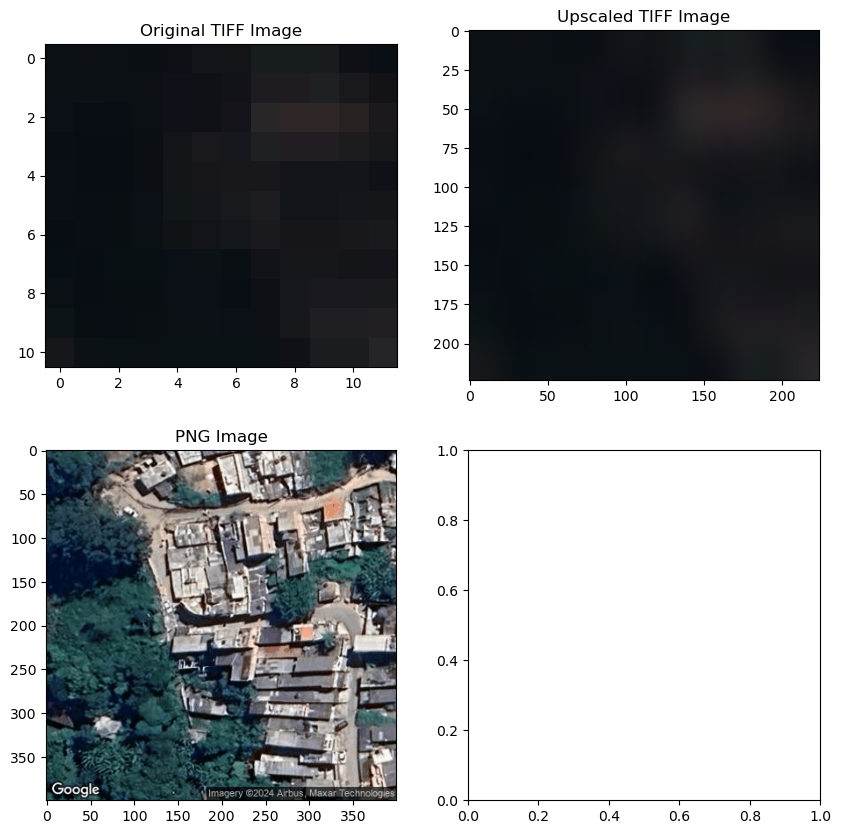

In [41]:

# Função para carregar imagens TIFF
def load_tiff_image(file_path, target_size):
    with rasterio.open(file_path) as src:
        image = src.read([1, 2, 3])  # Ler os três primeiros canais
        image = np.moveaxis(image, 0, -1)  # Mover canais para a última dimensão
        # image = resize(image, target_size, mode='reflect', anti_aliasing=False)

    image_arr = Image.fromarray(np.uint8(image*255))
    upscaled_image = image_arr.resize(target_size, Image.LANCZOS)
    return np.asarray(image), np.asarray(upscaled_image)

# Função para carregar imagens PNG
def load_png_image(file_path, target_size):
    image = imread(file_path)
    # image = resize(image, target_size, mode='reflect', anti_aliasing=True)
    return image

# Caminhos para as imagens
tiff_image_path = '../dataset/GEE_SENT2_RGB_2020_05/4450_1.tif'
png_image_path = '../dataset/GMAPS_RGB_2024/4450_1.png'
target_size = (224, 224)  # Tamanho alvo para redimensionamento

# Carregar imagens
original_tiff, upscaled_tiff = load_tiff_image(tiff_image_path, target_size)
png_image = load_png_image(png_image_path, target_size)

# Mostrar imagens
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].imshow(original_tiff)
axs[0][0].set_title('Original TIFF Image')

axs[0][1].imshow(upscaled_tiff)
axs[0][1].set_title('Upscaled TIFF Image')

axs[1][0].imshow(png_image)
axs[1][0].set_title('PNG Image')

plt.show()


In [ ]:

# Imprimir estatísticas básicas
print('TIFF Image Stats:')
print(f'Min: {tiff_image.min()}, Max: {tiff_image.max()}, Mean: {tiff_image.mean()}')

print('PNG Image Stats:')
print(f'Min: {png_image.min()}, Max: {png_image.max()}, Mean: {png_image.mean()}')
